In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
import tensorflow_text as text

In [2]:
forms = pd.read_csv("gensim_sentences_formalities.csv")
forms = np.array(forms)
sens = pd.read_csv("../../data/sensitivity_data/sensitivity_dataset.csv")
sens = sens[["Sensitivity"]]
sens = np.array(sens)

In [3]:
corpus_positions = []
colours = []
for i in range(len(forms)):
    doc_positions = []
    for j in range(len(forms[i])):

        if np.isnan(forms[i][j]) == False:
            doc_positions.append(j)
        else:
            doc_positions.append(np.nan)
            
        if sens[i] == 0:
            colours.append("Blue")
        else:
            colours.append("Red")

    corpus_positions.append(doc_positions)
    
corpus_positions = np.array(corpus_positions)

Text(0.5, 1.0, 'Formality vs Position In Document')

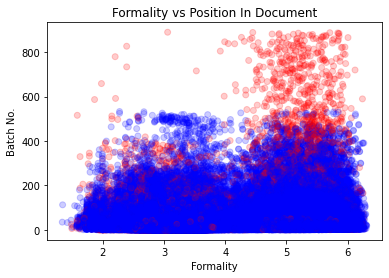

In [4]:
pos_flattened = corpus_positions.flatten()
forms_flattened = forms.flatten()

#plt.figure(dpi=1200)
ticks = np.linspace(min(forms_flattened),max(forms_flattened),10)
plt.scatter(forms_flattened,pos_flattened,alpha=0.2,c=colours)
plt.xlabel("Formality")
plt.ylabel("Batch No.")
plt.title("Formality vs Position In Document")
#plt.savefig("formality_visualisations/formality_vs_position.png")

In [12]:
corpus_positions = []
colours = []
alphas = []
for i in range(len(forms)):
    doc_positions = []
    for j in range(len(forms[i])):

        if np.isnan(forms[i][j]) == False:
            doc_positions.append(j)
        else:
            doc_positions.append(np.nan)
            
        if sens[i] == 0:
            colours.append("Blue")
            alphas.append(0.1)
        else:
            colours.append("Red")
            alphas.append(1)

    corpus_positions.append(doc_positions)
    
corpus_positions = np.array(corpus_positions)

In [13]:
pos_flattened = corpus_positions.flatten()
forms_flattened = forms.flatten()

plt.figure(dpi=1200)
ticks = np.linspace(min(forms_flattened),max(forms_flattened),10)
plt.scatter(forms_flattened,pos_flattened,alpha=alphas,c=colours)
plt.xlabel("Formality")
plt.ylabel("Batch No.")
plt.title("Formality vs Position In Document (Non-Sensitive Documents at alpha=0.1)",fontsize=10)
plt.savefig("formality_visualisations/formality_vs_position_high_alpha_nonsensitive.png")

In [7]:
sensitive_forms = []
insensitive_forms = []

for i in range(len(forms)):
    if sens[i] == 1:
        sensitive_forms.append(forms[i])
    else:
        insensitive_forms.append(forms[i])

sensitive_forms = np.array(sensitive_forms)
insensitive_forms = np.array(insensitive_forms)
sensitive_forms = sensitive_forms.flatten()
insensitive_forms = insensitive_forms.flatten()

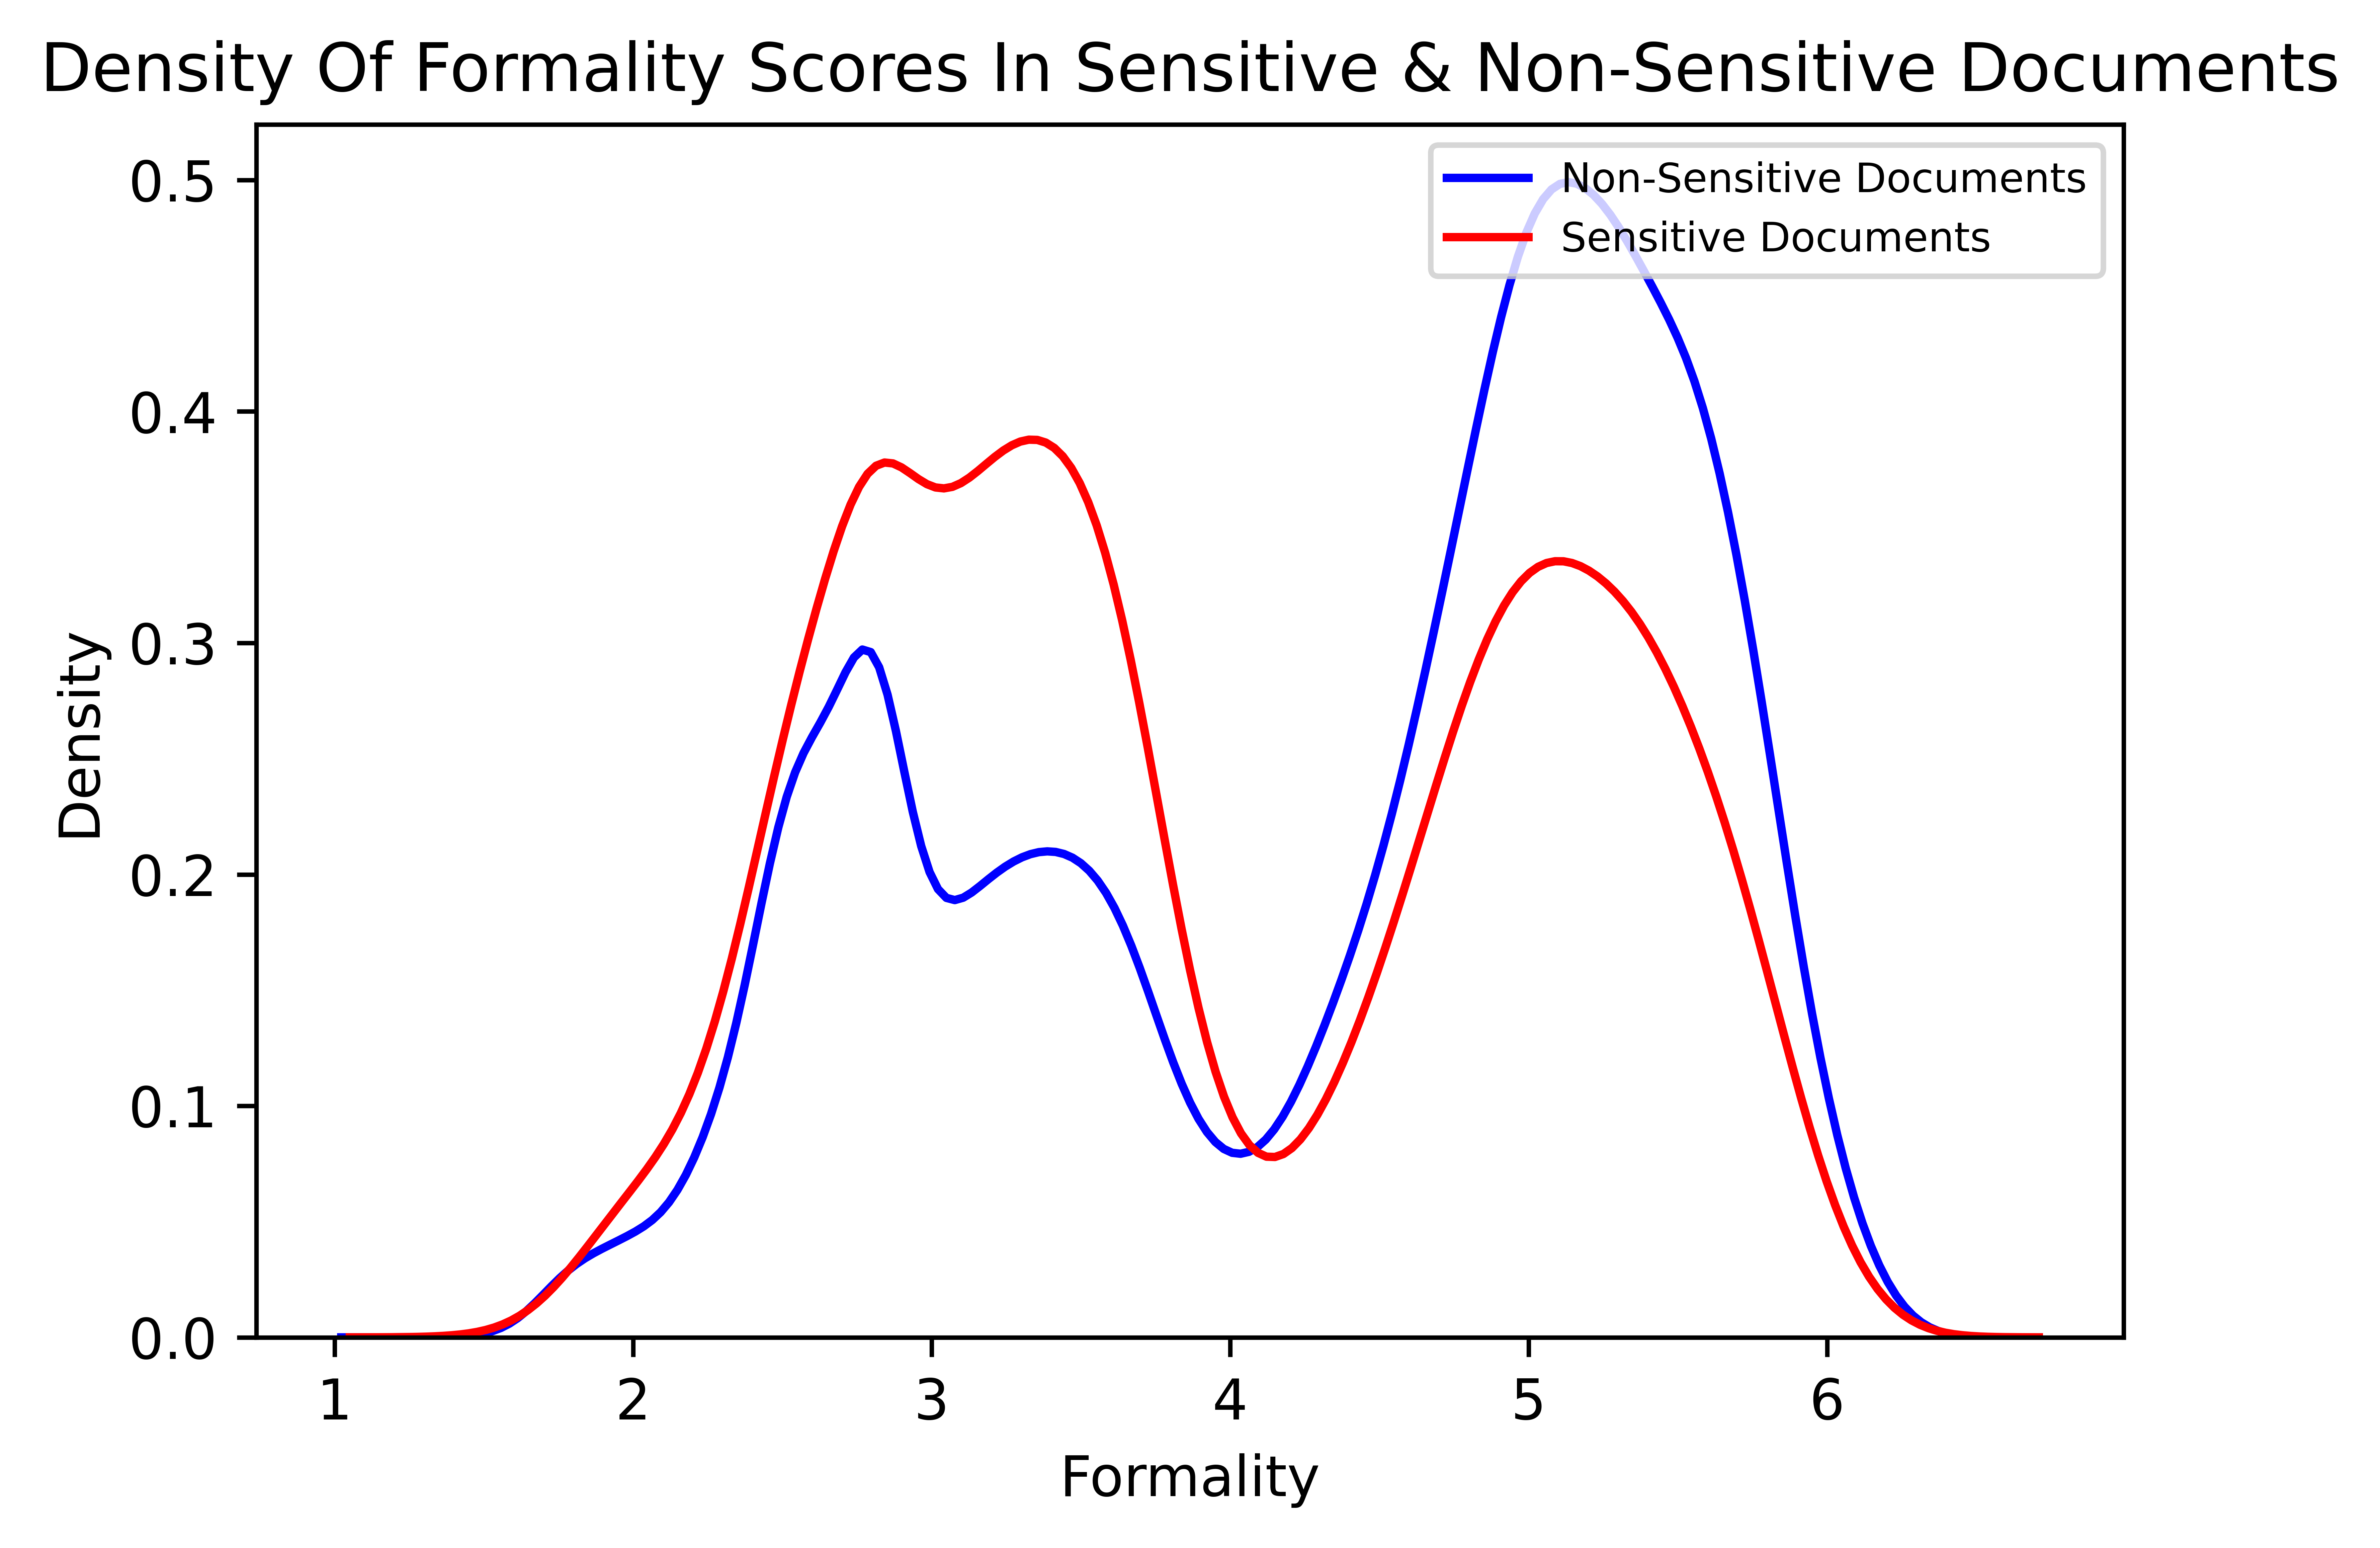

In [8]:
plt.figure(dpi=1200)
sns.kdeplot(data=insensitive_forms, label='Non-Sensitive Documents',color="Blue")
sns.kdeplot(data=sensitive_forms, label='Sensitive Documents',color="Red")
plt.xlabel("Formality")
plt.legend(["Non-Sensitive Documents","Sensitive Documents"], loc='upper right',fontsize=7.3)
plt.title("Density Of Formality Scores In Sensitive & Non-Sensitive Documents")
plt.savefig("formality_visualisations/formality_densities.png")

In [9]:
sens_starts = []
sens_middles = []
sens_ends = []
sensitive_forms = []
insensitive_forms = []
insens_starts = []
insens_middles = []
insens_ends = []

for i in range(len(forms)):
    if sens[i] == 1:
        sensitive_forms.append(forms[i])
    else:
        insensitive_forms.append(forms[i])

for i in range(len(sensitive_forms)):
    no_nans = sensitive_forms[i][~np.isnan(sensitive_forms[i])]
    split = np.array_split(no_nans,3)
    for elt in split[0]:
        sens_starts.append(elt)
    for elt in split[1]:
        sens_middles.append(elt)
    for elt in split[2]:
        sens_ends.append(elt)

for i in range(len(insensitive_forms)):
    no_nans = insensitive_forms[i][~np.isnan(insensitive_forms[i])]
    split = np.array_split(no_nans,3)
    for elt in split[0]:
        insens_starts.append(elt)
    for elt in split[1]:
        insens_middles.append(elt)
    for elt in split[2]:
        insens_ends.append(elt)

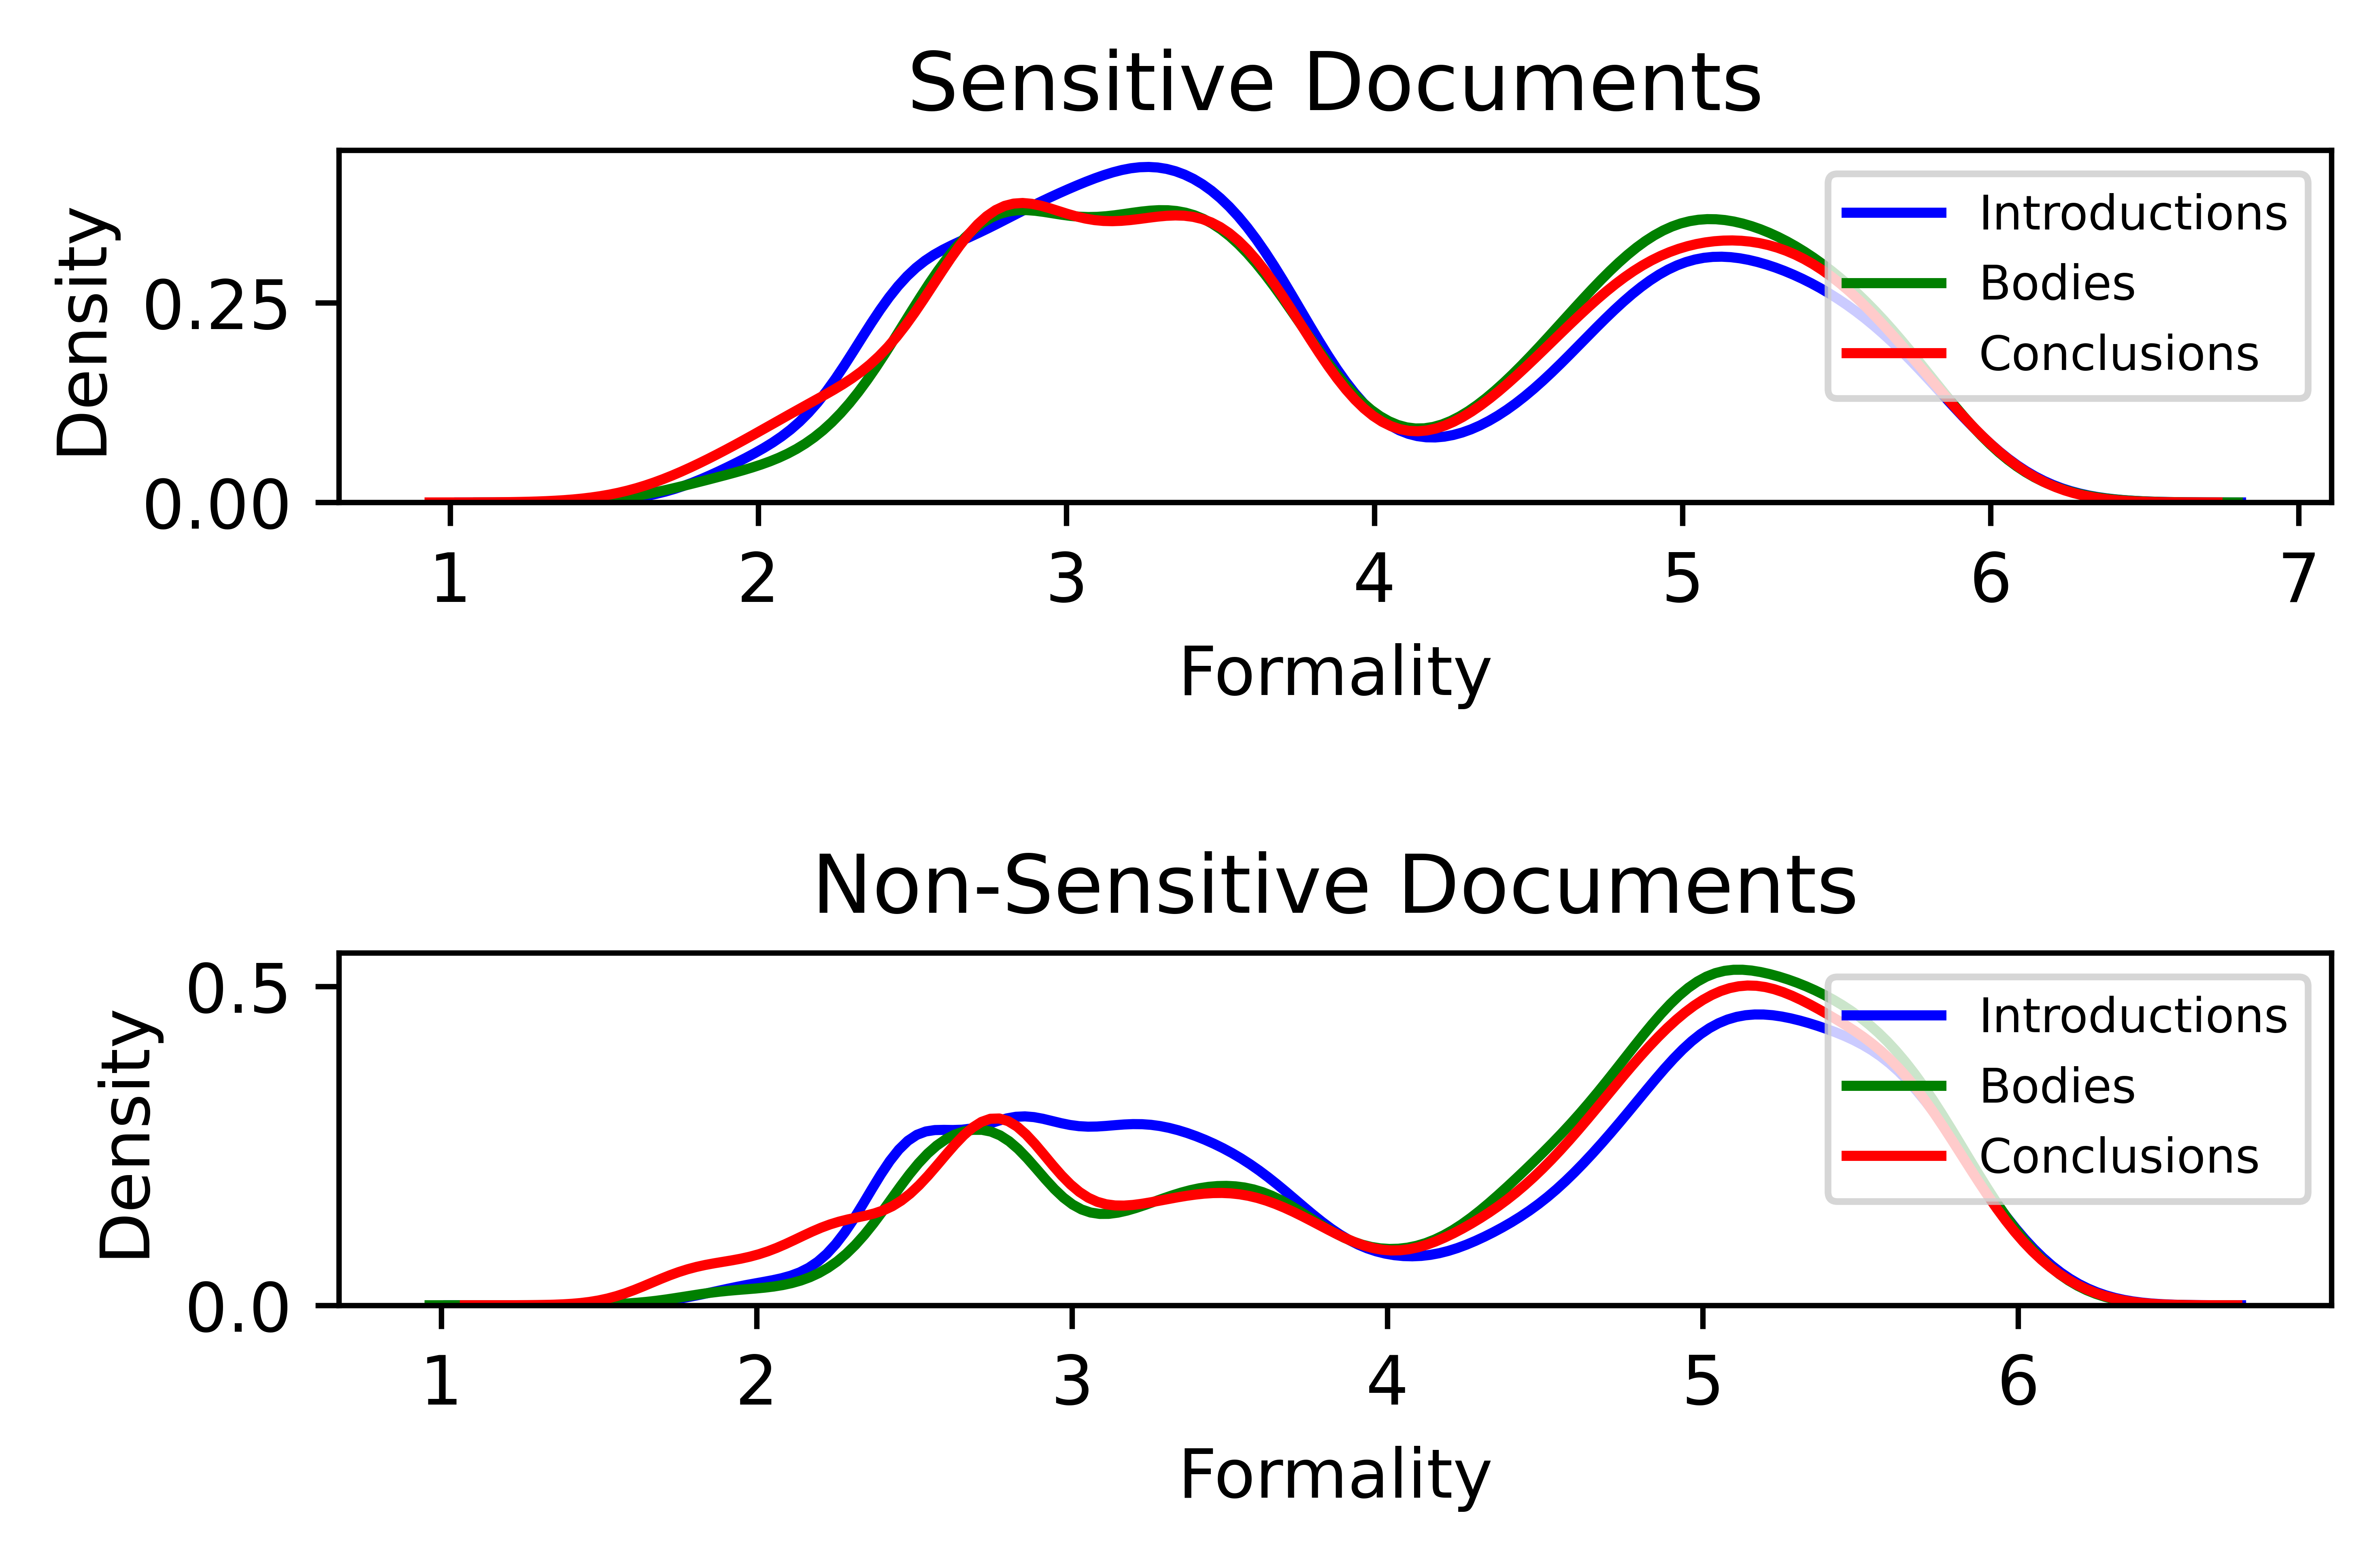

In [10]:
fig, axs = plt.subplots(2)
sns.kdeplot(data=sens_starts, label='Introduction',color="Blue",ax=axs[0])
sns.kdeplot(data=sens_middles, label='Body',color="Green",ax=axs[0])
sns.kdeplot(data=sens_ends, label='Conclusion',color="Red",ax=axs[0])

sns.kdeplot(data=insens_starts, label='Introduction',color="Blue",ax=axs[1])
sns.kdeplot(data=insens_middles, label='Body',color="Green",ax=axs[1])
sns.kdeplot(data=insens_ends, label='Conclusion',color="Red",ax=axs[1])

fig.set_dpi(1200)
fig.tight_layout(pad=5.0)

axs[0].set_xlabel("Formality")
axs[1].set_xlabel("Formality")

axs[0].set_title("Sensitive Documents")
axs[1].set_title("Non-Sensitive Documents")

axs[0].legend(["Introductions","Bodies","Conclusions"], loc='upper right',fontsize=7)
axs[1].legend(["Introductions","Bodies","Conclusions"], loc='upper right',fontsize=7)

plt.savefig("formality_visualisations/narrative_structure_densities.png")

In [11]:
data = pd.read_csv("../../data/sensitivity_data/sensitivity_dataset.csv")
data = data[["Document","Sensitivity"]]
data = np.array(data)

def convert(lst):
    return ' '.join(lst).split()

formalities_model = tf.keras.models.load_model('../deep_learning/bert_small_e20_b32')

random_choices = [random.randrange(len(data)) for i in range(100)]
corpus_formalities = []
for j, document in enumerate(random_choices):
    words = convert([data[document][0]])
    document_formalities = []
    for i in range(100):
        document_formalities.append(formalities_model.predict([' '.join(words[0:i])])[0][0])
        print("Done word: " + str(i+1) + " Document: " + str(j+1))
    corpus_formalities.append(document_formalities)

Done word: 1 Document: 1
Done word: 2 Document: 1
Done word: 3 Document: 1
Done word: 4 Document: 1
Done word: 5 Document: 1
Done word: 6 Document: 1
Done word: 7 Document: 1
Done word: 8 Document: 1
Done word: 9 Document: 1
Done word: 10 Document: 1
Done word: 11 Document: 1
Done word: 12 Document: 1
Done word: 13 Document: 1
Done word: 14 Document: 1
Done word: 15 Document: 1
Done word: 16 Document: 1
Done word: 17 Document: 1
Done word: 18 Document: 1
Done word: 19 Document: 1
Done word: 20 Document: 1
Done word: 21 Document: 1
Done word: 22 Document: 1
Done word: 23 Document: 1
Done word: 24 Document: 1
Done word: 25 Document: 1
Done word: 26 Document: 1
Done word: 27 Document: 1
Done word: 28 Document: 1
Done word: 29 Document: 1
Done word: 30 Document: 1
Done word: 31 Document: 1
Done word: 32 Document: 1
Done word: 33 Document: 1
Done word: 34 Document: 1
Done word: 35 Document: 1
Done word: 36 Document: 1
Done word: 37 Document: 1
Done word: 38 Document: 1
Done word: 39 Documen

KeyboardInterrupt: 

In [ ]:
plt.figure(dpi=1200)
for i in range(100):
    plt.plot(corpus_formalities[i])
plt.title("Word Count vs Formality Score of 100 Random Documents")
plt.xlabel("Number of words")
plt.ylabel("Formality Score")
plt.savefig("formality_visualisations/word_count_vs_formality.png")